### 1. 정확도

In [1]:
# digits 손글씨 데이터 

from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
digits_data = digits.data
digits_data.shape

# 데이터는 총 1797개, 각 데이터는 64개 숫자

(1797, 64)

In [3]:
digits_data[0] # 64개 숫자로 이루어진 배열(array)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

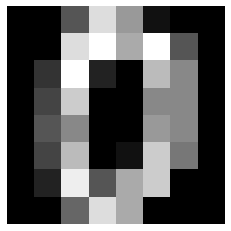

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

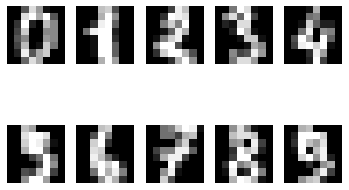

In [6]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray')
    plt.axis('off')
plt.show()

In [7]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# 해당 데이터가 3인지 아닌지 맞추는 문제
# 맞으면 3 아니면 0

new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

### digits_data와 new_label로 Decision Tree 모델을 학습시키고, 정확도 확인하기

In [14]:
from sklearn.metrics import accuracy_score ## accuracy_score 있어야 가능

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

In [16]:
# 정답을 모두 0으로만 선택해도 정확도가 90% 이라는 문제 발생

fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

### 문제 1 전체 데이터 중 맞은 데이터만 신경쓰는 정확도, 얼마나 안 틀렸냐도 중요하다.

### 오차행렬 (confusion matrix)
정답과 오답을 구분하여 표현하는 방법
- TP: 실제 클래스에 참 표시
- FP: 거짓 클래스에 참 표시
- FN: 거짓 클래스에 거짓 표시
- TN: 실제 클래스에 거짓 표시

**정밀도**
TP / TP + FP : 거짓인데 참으로 판단하는 경우가 적어야함

**재현율(Recall, Sensitivity)**
TP / TP + FN : 참인데 거짓으로 판단하는 경우가 적어야함

**정확도(Accuracy)**
TP + TN / TP + TN + FP + FN

In [20]:
# 오차행렬 확인

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# 순서대료 TP, FN, FP, TN

array([[320,  13],
       [  9,  18]])

In [21]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]])

In [22]:
# 정밀도, 재현성, F1 SCORE 한 번에 확인하기

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [23]:
# 정확도 확인

accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)